In [8]:
from chess_insight import (
    ChessComApiCommunicator,
    LichessApiCommunicator,
    export_games_to_csv,
)
import numpy as np

In [3]:
c1 = LichessApiCommunicator(depth=1)
c2 = ChessComApiCommunicator(depth=1)

In [12]:

games = list(c1.games_generator("pro100wdupe", 250, "blitz"))

export_games_to_csv(games)

Collected 250 games (api_communicator.py:62)


Output()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("games.csv")

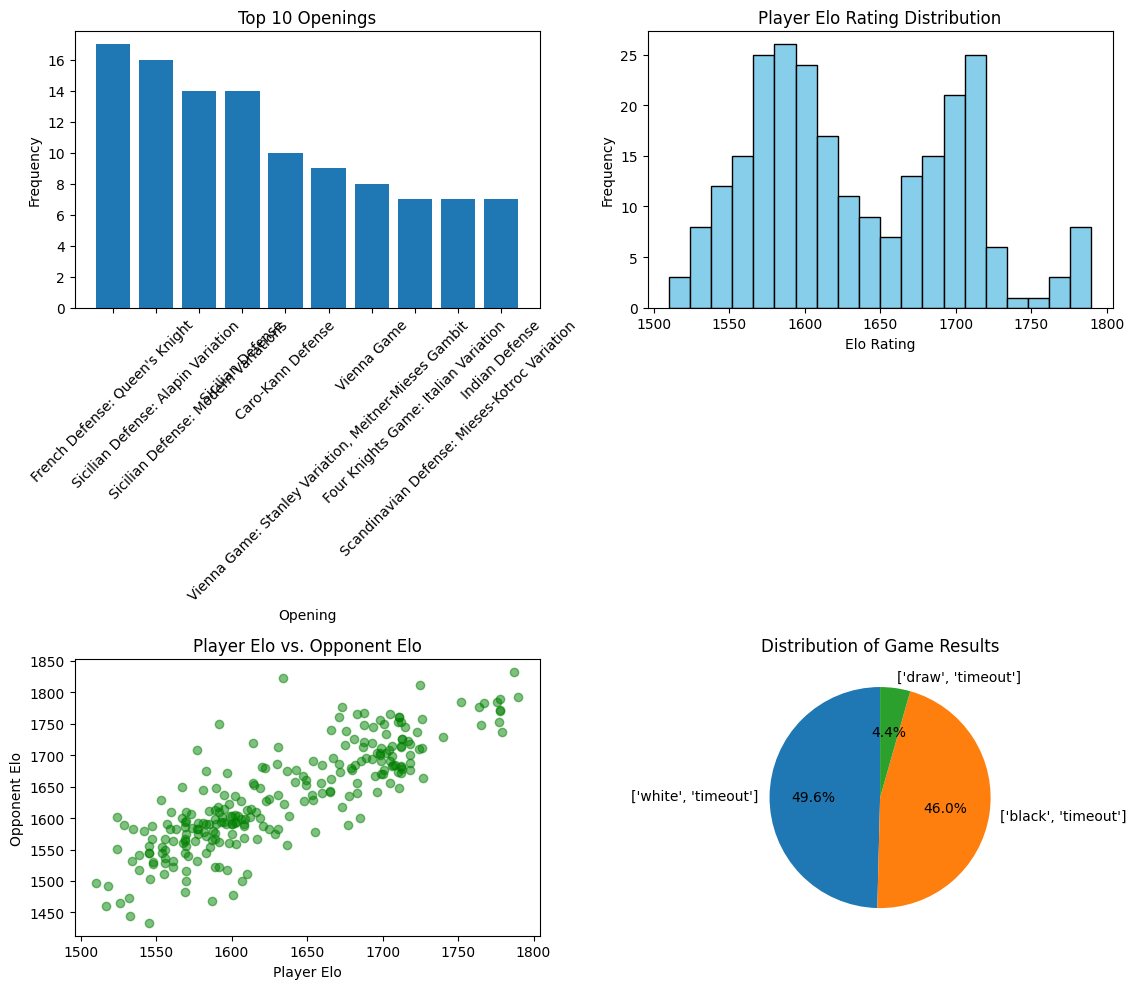

In [6]:
# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Bar chart for the frequency of openings
opening_counts = df['opening'].value_counts()
axes[0, 0].bar(opening_counts.index[:10], opening_counts[:10])
axes[0, 0].set_title('Top 10 Openings')
axes[0, 0].set_xlabel('Opening')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].tick_params(axis='x', rotation=45)

# Subplot 2: Histogram of player Elo ratings
axes[0, 1].hist(df['player_elo'], bins=20, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Player Elo Rating Distribution')
axes[0, 1].set_xlabel('Elo Rating')
axes[0, 1].set_ylabel('Frequency')

# Subplot 3: Scatter plot of player Elo vs. opponent Elo
axes[1, 0].scatter(df['player_elo'], df['opponent_elo'], alpha=0.5, color='green')
axes[1, 0].set_title('Player Elo vs. Opponent Elo')
axes[1, 0].set_xlabel('Player Elo')
axes[1, 0].set_ylabel('Opponent Elo')

# Subplot 4: Pie chart for the distribution of game results
result_counts = df['result'].value_counts()
axes[1, 1].pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribution of Game Results')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()


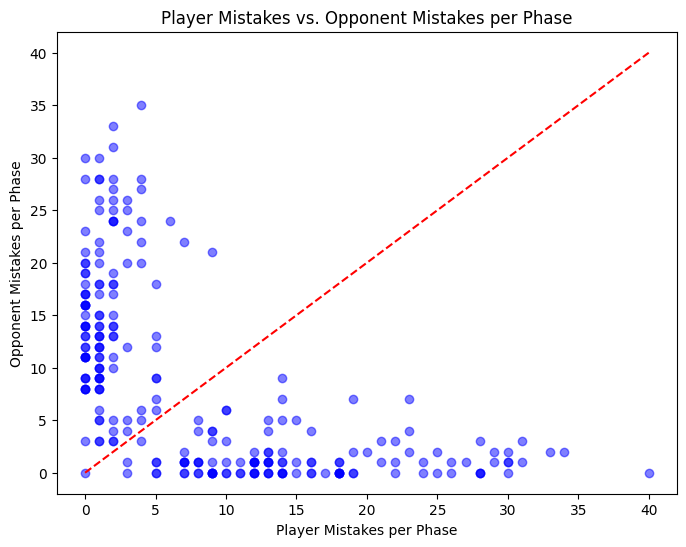

In [7]:
# Calculate player mistakes per phase
df['player_mistakes_per_phase'] = (df['player_accuracy_opening_inaccuracy'] +
                                     df['player_accuracy_middle_game_mistake'] +
                                     df['player_accuracy_end_game_blunder'])

# Calculate opponent mistakes per phase
df['opponent_mistakes_per_phase'] = (df['opponent_accuracy_opening_inaccuracy'] +
                                       df['opponent_accuracy_middle_game_mistake'] +
                                       df['opponent_accuracy_end_game_blunder'])

# Create a scatter plot to compare player vs. opponent mistakes per phase
plt.figure(figsize=(8, 6))
plt.scatter(df['player_mistakes_per_phase'], df['opponent_mistakes_per_phase'], alpha=0.5, color='blue')
plt.title('Player Mistakes vs. Opponent Mistakes per Phase')
plt.xlabel('Player Mistakes per Phase')
plt.ylabel('Opponent Mistakes per Phase')

# Add a reference line for equality (y = x)
plt.plot([0, max(df['player_mistakes_per_phase'])], [0, max(df['player_mistakes_per_phase'])], color='red', linestyle='--')

plt.show()

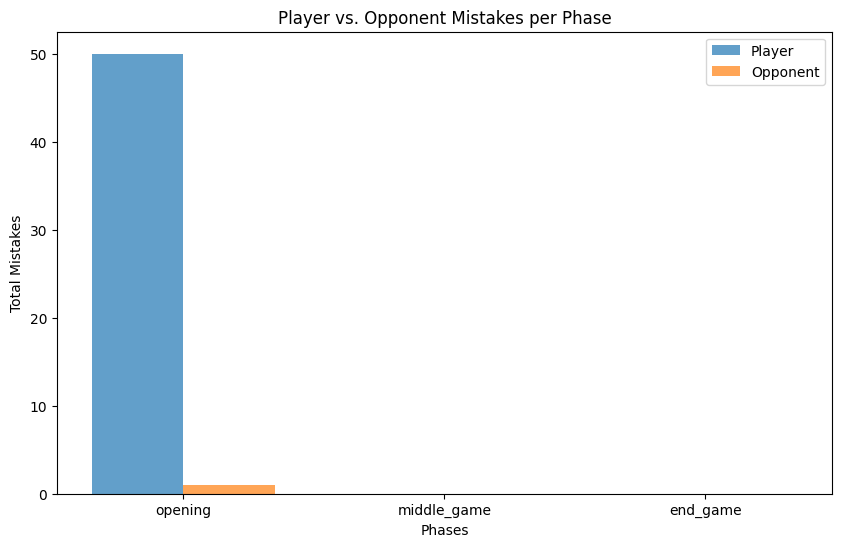

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame

# Calculate total player and opponent mistakes per phase
phases = ['opening', 'middle_game', 'end_game']
player_mistakes = [df[df['phases_' + phase] == 1]['total_player_mistakes'].sum() for phase in phases]
opponent_mistakes = [df[df['phases_' + phase] == 1]['total_opponent_mistakes'].sum() for phase in phases]

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(phases))

player_bars = ax.bar(index, player_mistakes, bar_width, label='Player', alpha=0.7)
opponent_bars = ax.bar([i + bar_width for i in index], opponent_mistakes, bar_width, label='Opponent', alpha=0.7)

ax.set_xlabel('Phases')
ax.set_ylabel('Total Mistakes')
ax.set_title('Player vs. Opponent Mistakes per Phase')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(phases)
ax.legend()

plt.show()